In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

In [9]:
#Read/Use Clean DataFrame
df = pd.read_csv("TestFileForMachineLearning.csv")
df.head()

,Region,Alcohol,Fatality,Age,Weather
0,1,0,1,34,1
1,1,0,0,23,2
2,1,0,0,93,0
3,1,0,0,45,0
4,1,0,0,16,0


In [10]:
#Set features and target variables
X = df.drop(columns=["Fatality"])

#Target variable is whether or not accident included a fatality
y = df['Fatality']

In [11]:
#Import dependencies for scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train/Test/Split data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Fit scaler to the training set of features
scaler = StandardScaler().fit(X_train)

#Transforming both the training and testing datasets into scaled data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Use RandomForestClassifier on scaled data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500).fit(X_train_scaled, y_train)

[0.20990826 0.1906431  0.46729622 0.13215241]


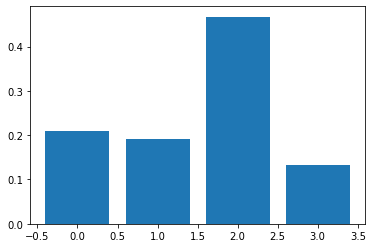

In [13]:
#Finding the most important features of the dataset
features1 = clf.feature_importances_
print(features1)
plt.bar(x = range(len(features1)), height=features1)
plt.show()

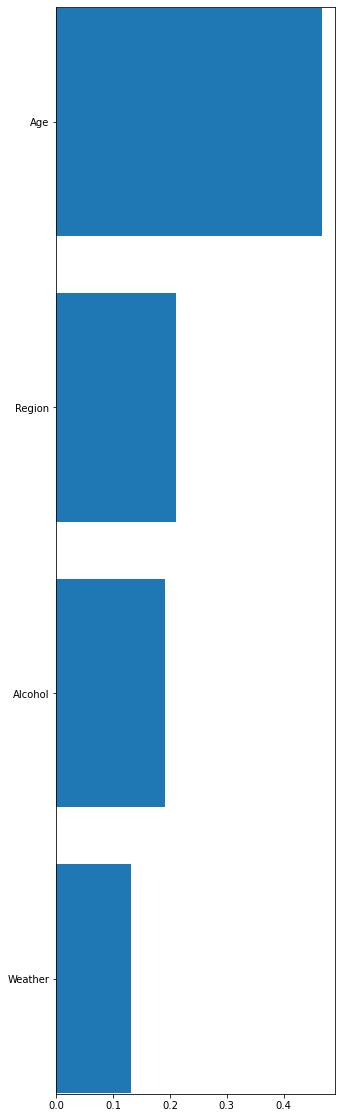

In [14]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, features1), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [15]:
#Fitting most important features to a model
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False,  True, False])

In [16]:
#Training and testing the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y)

In [17]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy="auto").fit_resample(
    X_selected_train, y_train
)
Counter(y_resampled)

Counter({1: 28, 0: 28})

In [19]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [21]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_selected_test)
balanced_accuracy_score(y_test, y_pred)

0.22727272727272727

In [23]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5, 6],
       [1, 0]], dtype=int64)

In [24]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.45      0.00      0.59      0.00      0.00        11
          1       0.00      0.00      0.45      0.00      0.00      0.00         1

avg / total       0.76      0.42      0.04      0.54      0.00      0.00        12

